In [37]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

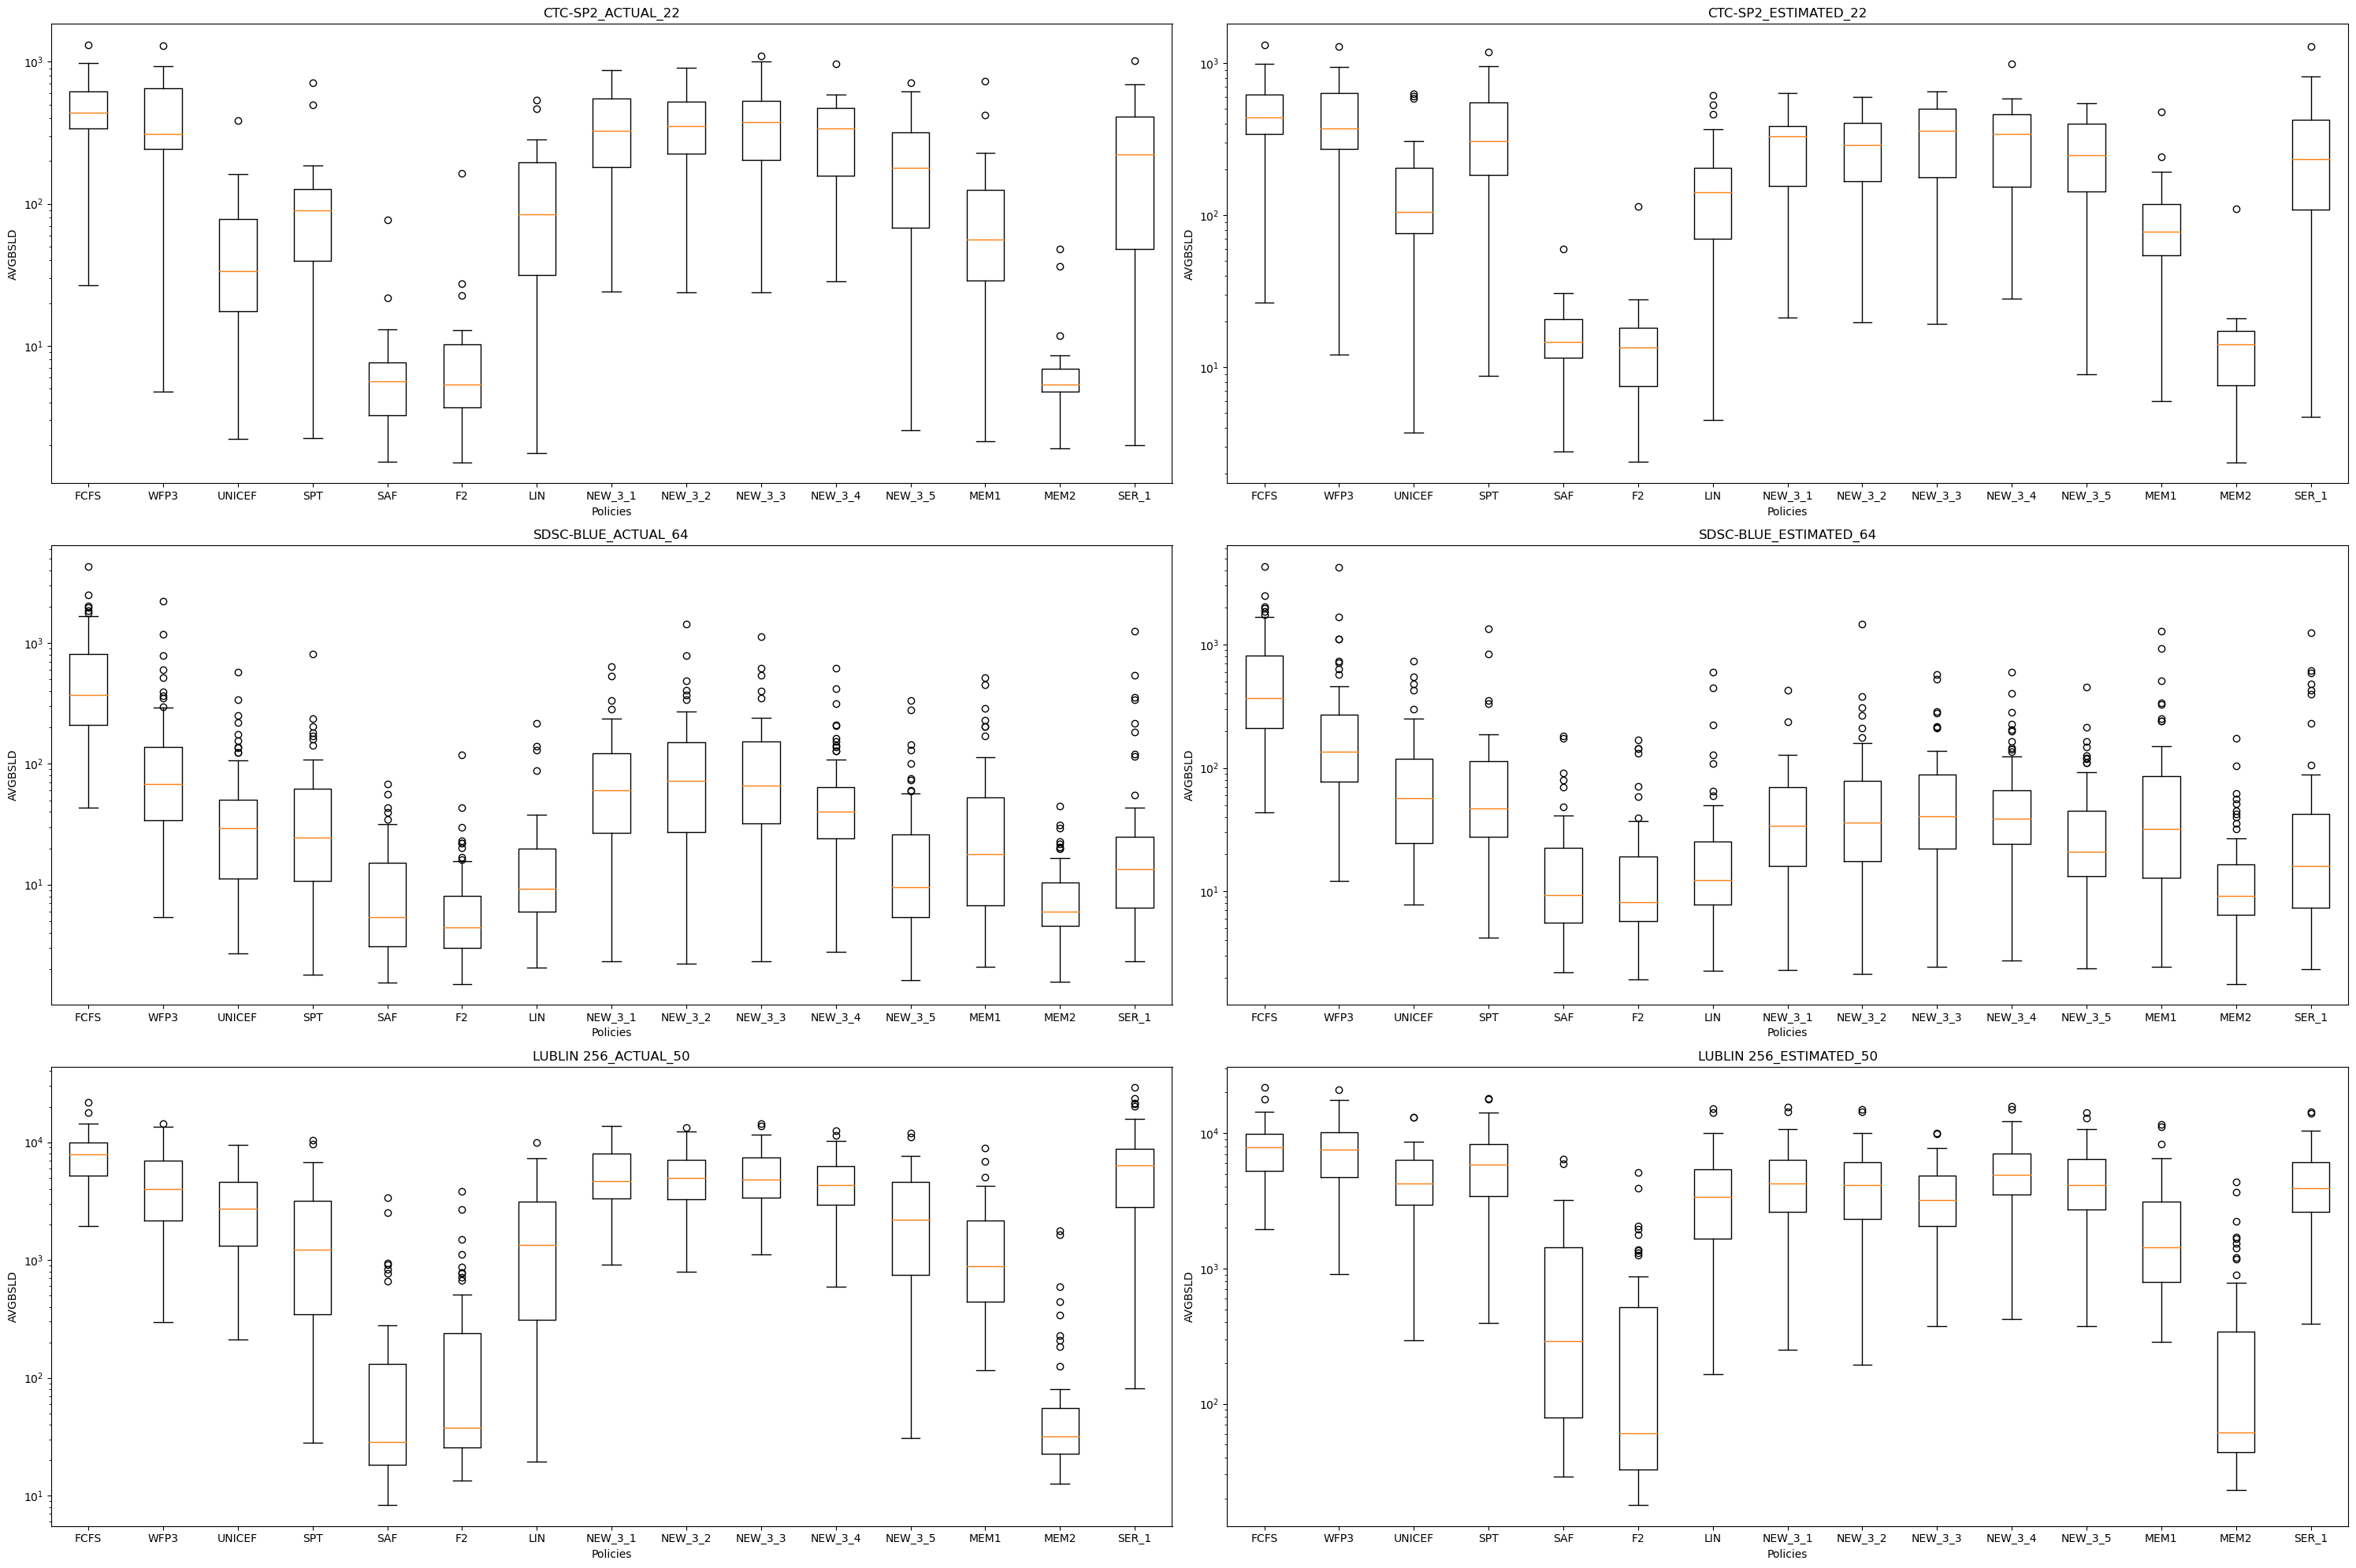

In [38]:
df=[]

# Lire le fichier CSV
df.append(pd.read_csv('CTC-SP2_ACTUAL_22_15.csv'))
df.append(pd.read_csv('CTC-SP2_ESTIMATED_22_15.csv'))
df.append(pd.read_csv('SDSC-BLUE_ACTUAL_64_15.csv'))
df.append(pd.read_csv('SDSC-BLUE_ESTIMATED_64_15.csv'))
df.append(pd.read_csv('LUBLIN 256_ACTUAL_50_15.csv'))
df.append(pd.read_csv('LUBLIN 256_ESTIMATED_50_15.csv'))
title= ['CTC-SP2_ACTUAL_22','CTC-SP2_ESTIMATED_22','SDSC-BLUE_ACTUAL_64','SDSC-BLUE_ESTIMATED_64','LUBLIN 256_ACTUAL_50','LUBLIN 256_ESTIMATED_50']
names=["FCFS","WFP3","UNICEF","SPT","SAF","F2","LIN","NEW_3_1","NEW_3_2","NEW_3_3","NEW_3_4","NEW_3_5","MEM1","MEM2","SER_1"]
# Créer une figure avec des sous-graphiques (2 lignes, 3 colonnes)
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(30, 20))
i=0
# Boucle sur chaque subplot
for ax in axes.flatten():
    ax.boxplot(df[i],labels=names)
    ax.set_title(title[i])
    ax.set_yscale("log")
    ax.set_xlabel("Policies")
    ax.set_ylabel("AVGBSLD")
    i=i+1

# Ajuster les espaces entre les subplots
plt.tight_layout()

# Sauvegarder la figure dans les deux formats
#plt.savefig("../../images/Final_Tester_analysis_SER.pdf")
#plt.savefig("../../images/Final_Tester_analysis_SER.png")
# Afficher la figure
plt.show()

In [39]:
data = []
files = [
    'CTC-SP2_ACTUAL_22_15.csv',
    'CTC-SP2_ESTIMATED_22_15.csv',
    'SDSC-BLUE_ACTUAL_64_15.csv',
    'SDSC-BLUE_ESTIMATED_64_15.csv',
    'LUBLIN 256_ACTUAL_50_15.csv',
    'LUBLIN 256_ESTIMATED_50_15.csv'
]

for file in files:
    data.append(pd.read_csv(file).median())

# Concaténer les DataFrames


# Calculer la moyenne de chaque colonne


# Afficher les moyennes
print(data)

[FCFS       438.369184
WFP3       309.719725
UNICEF      33.704712
SPT         90.252655
SAF          5.592878
F2           5.316921
LIN         84.347879
NEW_3_1    326.413246
NEW_3_2    350.281405
NEW_3_3    375.604073
NEW_3_4    340.576487
NEW_3_5    178.729296
MEM1        56.172036
MEM2         5.354759
SER_1      221.320024
dtype: float64, FCFS       438.369184
WFP3       369.928341
UNICEF     104.979709
SPT        306.777931
SAF         14.628445
F2          13.457998
LIN        140.303667
NEW_3_1    330.193584
NEW_3_2    289.048557
NEW_3_3    356.071046
NEW_3_4    339.078370
NEW_3_5    245.704765
MEM1        77.604733
MEM2        14.063698
SER_1      233.811585
dtype: float64, FCFS       370.216801
WFP3        67.831731
UNICEF      29.532761
SPT         24.651643
SAF          5.363575
F2           4.411869
LIN          9.219513
NEW_3_1     60.408491
NEW_3_2     71.823870
NEW_3_3     65.893765
NEW_3_4     40.175932
NEW_3_5      9.510106
MEM1        17.795967
MEM2         5.961609

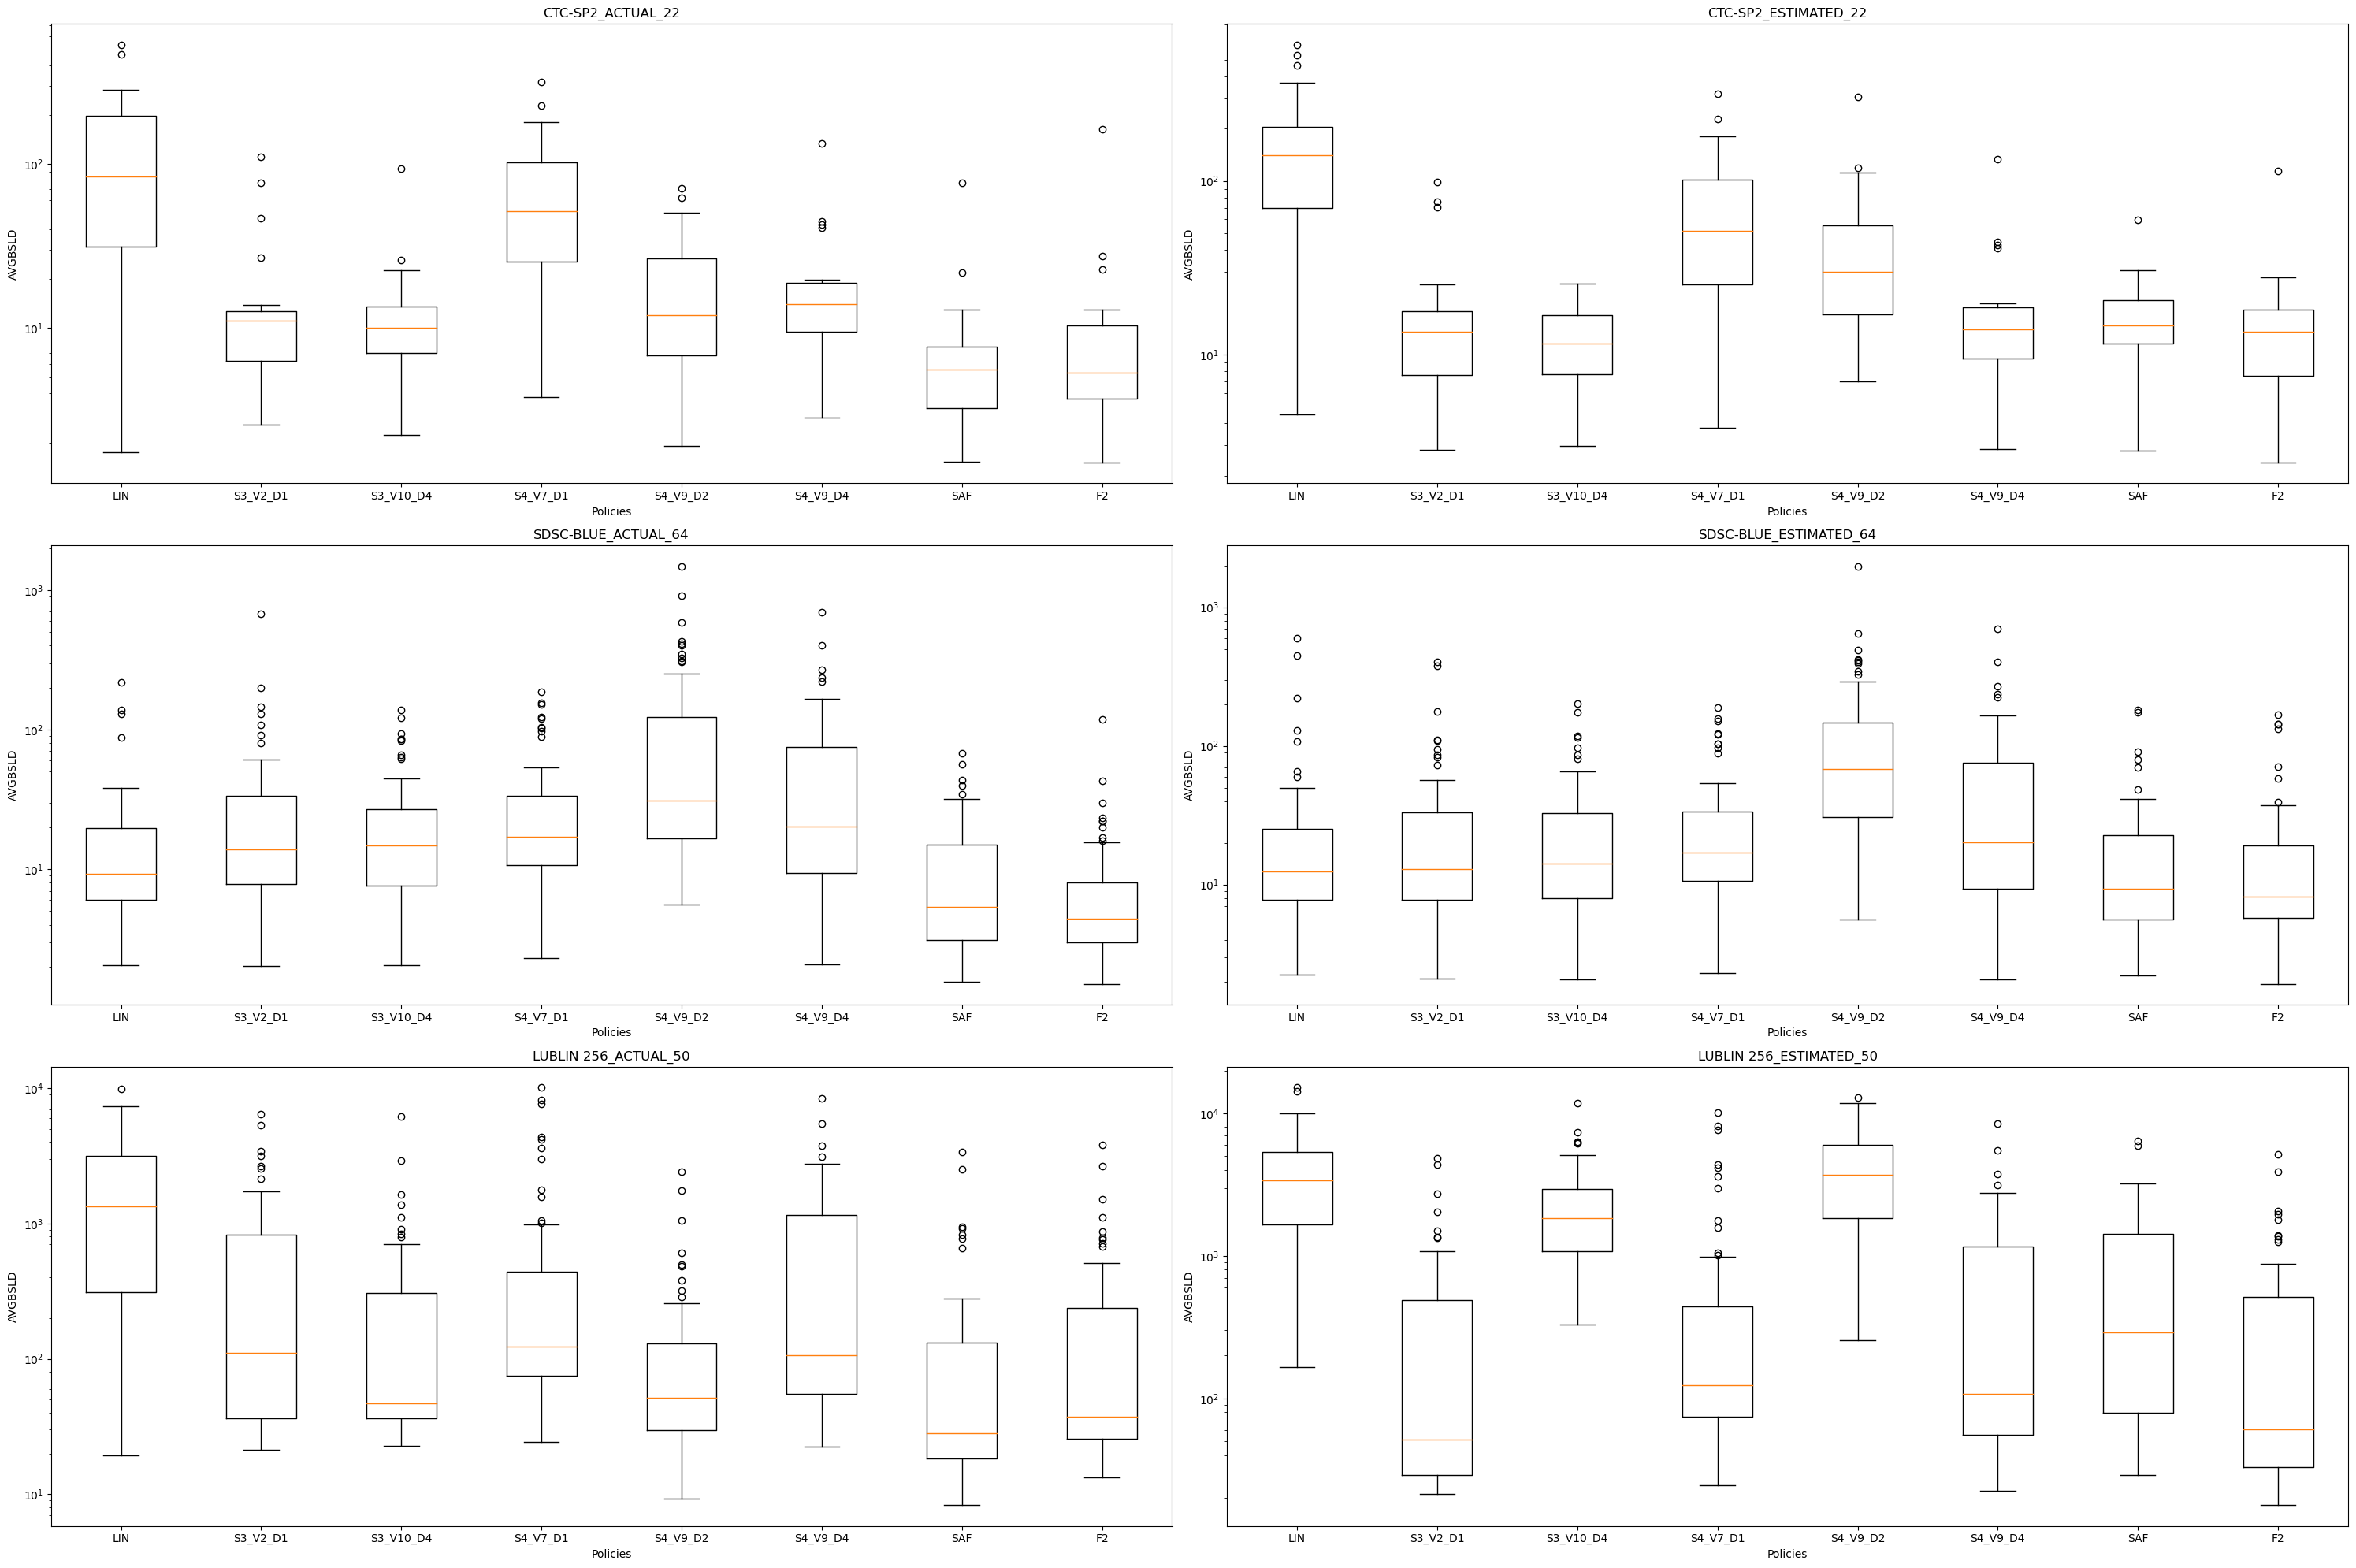

In [40]:
df=[]

# Lire le fichier CSV
df.append(pd.read_csv('CTC-SP2_ACTUAL_22_8.csv'))
df.append(pd.read_csv('CTC-SP2_ESTIMATED_22_8.csv'))
df.append(pd.read_csv('SDSC-BLUE_ACTUAL_64_8.csv'))
df.append(pd.read_csv('SDSC-BLUE_ESTIMATED_64_8.csv'))
df.append(pd.read_csv('LUBLIN 256_ACTUAL_50_8.csv'))
df.append(pd.read_csv('LUBLIN 256_ESTIMATED_50_8.csv'))
title= ['CTC-SP2_ACTUAL_22','CTC-SP2_ESTIMATED_22','SDSC-BLUE_ACTUAL_64','SDSC-BLUE_ESTIMATED_64','LUBLIN 256_ACTUAL_50','LUBLIN 256_ESTIMATED_50']
names=["LIN","S3_V2_D1","S3_V10_D4","S4_V7_D1","S4_V9_D2","S4_V9_D4","SAF","F2"]
# Créer une figure avec des sous-graphiques (2 lignes, 3 colonnes)
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(30, 20))
i=0
# Boucle sur chaque subplot
for ax in axes.flatten():
    ax.boxplot(df[i],labels=names)
    ax.set_title(title[i])
    ax.set_yscale("log")
    ax.set_xlabel("Policies")
    ax.set_ylabel("AVGBSLD")
    i=i+1

# Ajuster les espaces entre les subplots
plt.tight_layout()

# Sauvegarder la figure dans les deux formats
#plt.savefig("../../images/Final_Tester_analysis_SER.pdf")
#plt.savefig("../../images/Final_Tester_analysis_SER.png")
# Afficher la figure
plt.show()

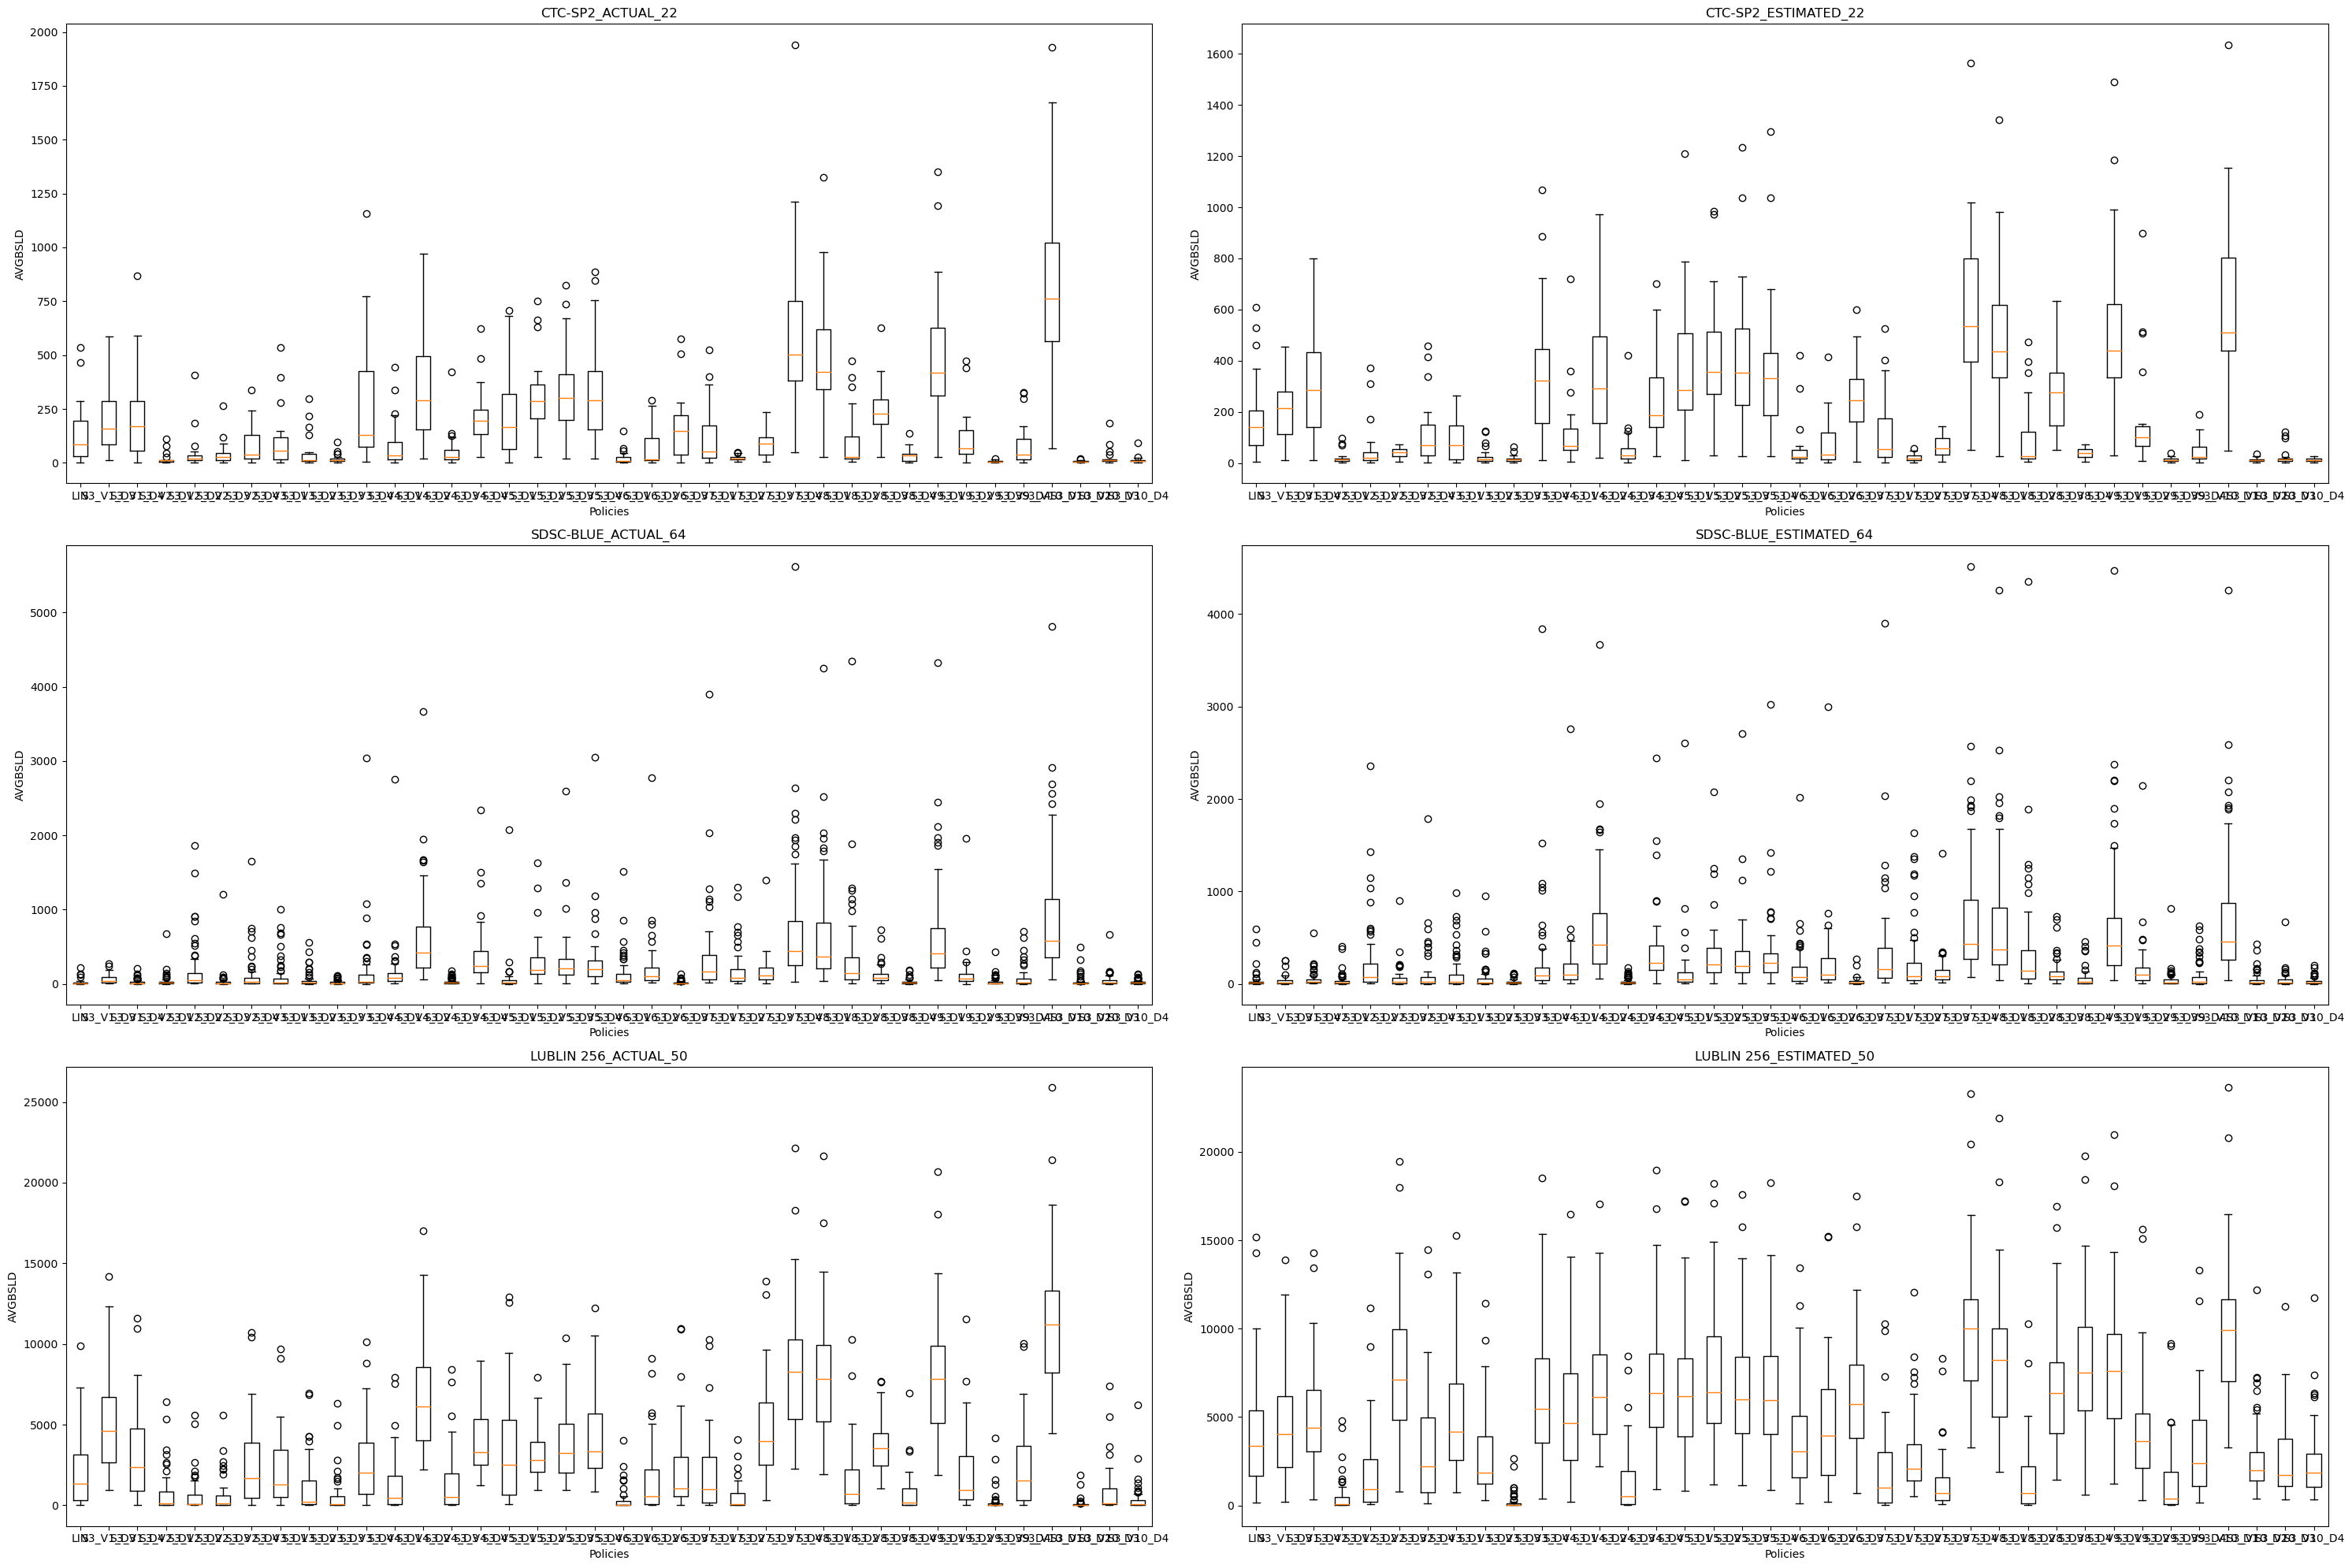

In [41]:
df=[]

# Lire le fichier CSV
df.append(pd.read_csv('CTC-SP2_ACTUAL_22_38.csv'))
df.append(pd.read_csv('CTC-SP2_ESTIMATED_22_38.csv'))
df.append(pd.read_csv('SDSC-BLUE_ACTUAL_64_38.csv'))
df.append(pd.read_csv('SDSC-BLUE_ESTIMATED_64_38.csv'))
df.append(pd.read_csv('LUBLIN 256_ACTUAL_50_38.csv'))
df.append(pd.read_csv('LUBLIN 256_ESTIMATED_50_38.csv'))
title= ['CTC-SP2_ACTUAL_22','CTC-SP2_ESTIMATED_22','SDSC-BLUE_ACTUAL_64','SDSC-BLUE_ESTIMATED_64','LUBLIN 256_ACTUAL_50','LUBLIN 256_ESTIMATED_50']
names=["LIN","S3_V1_D3","S3_V1_D4",
         "S3_V2_D1","S3_V2_D2","S3_V2_D3","S3_V2_D4",
         "S3_V3_D1","S3_V3_D2","S3_V3_D3","S3_V3_D4",
         "S3_V4_D1","S3_V4_D2","S3_V4_D3","S3_V4_D4",
         "S3_V5_D1","S3_V5_D2","S3_V5_D3","S3_V5_D4",
         "S3_V6_D1","S3_V6_D2","S3_V6_D3",
         "S3_V7_D1","S3_V7_D2","S3_V7_D3","S3_V7_D4",
         "S3_V8_D1","S3_V8_D2","S3_V8_D3","S3_V8_D4",
         "S3_V9_D1","S3_V9_D2","S3_V9_D3","S3_V9_D4",
         "S3_V10_D1","S3_V10_D2","S3_V10_D3","S3_V10_D4"]
# Créer une figure avec des sous-graphiques (2 lignes, 3 colonnes)
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(30, 20))
i=0
# Boucle sur chaque subplot
for ax in axes.flatten():
    ax.boxplot(df[i],labels=names)
    ax.set_title(title[i])
    ax.set_xlabel("Policies")
    ax.set_ylabel("AVGBSLD")
    i=i+1

# Ajuster les espaces entre les subplots
plt.tight_layout()

# Sauvegarder la figure dans les deux formats
#plt.savefig("../../images/Final_Tester_analysis_SER.pdf")
#plt.savefig("../../images/Final_Tester_analysis_SER.png")
# Afficher la figure
plt.show()

30


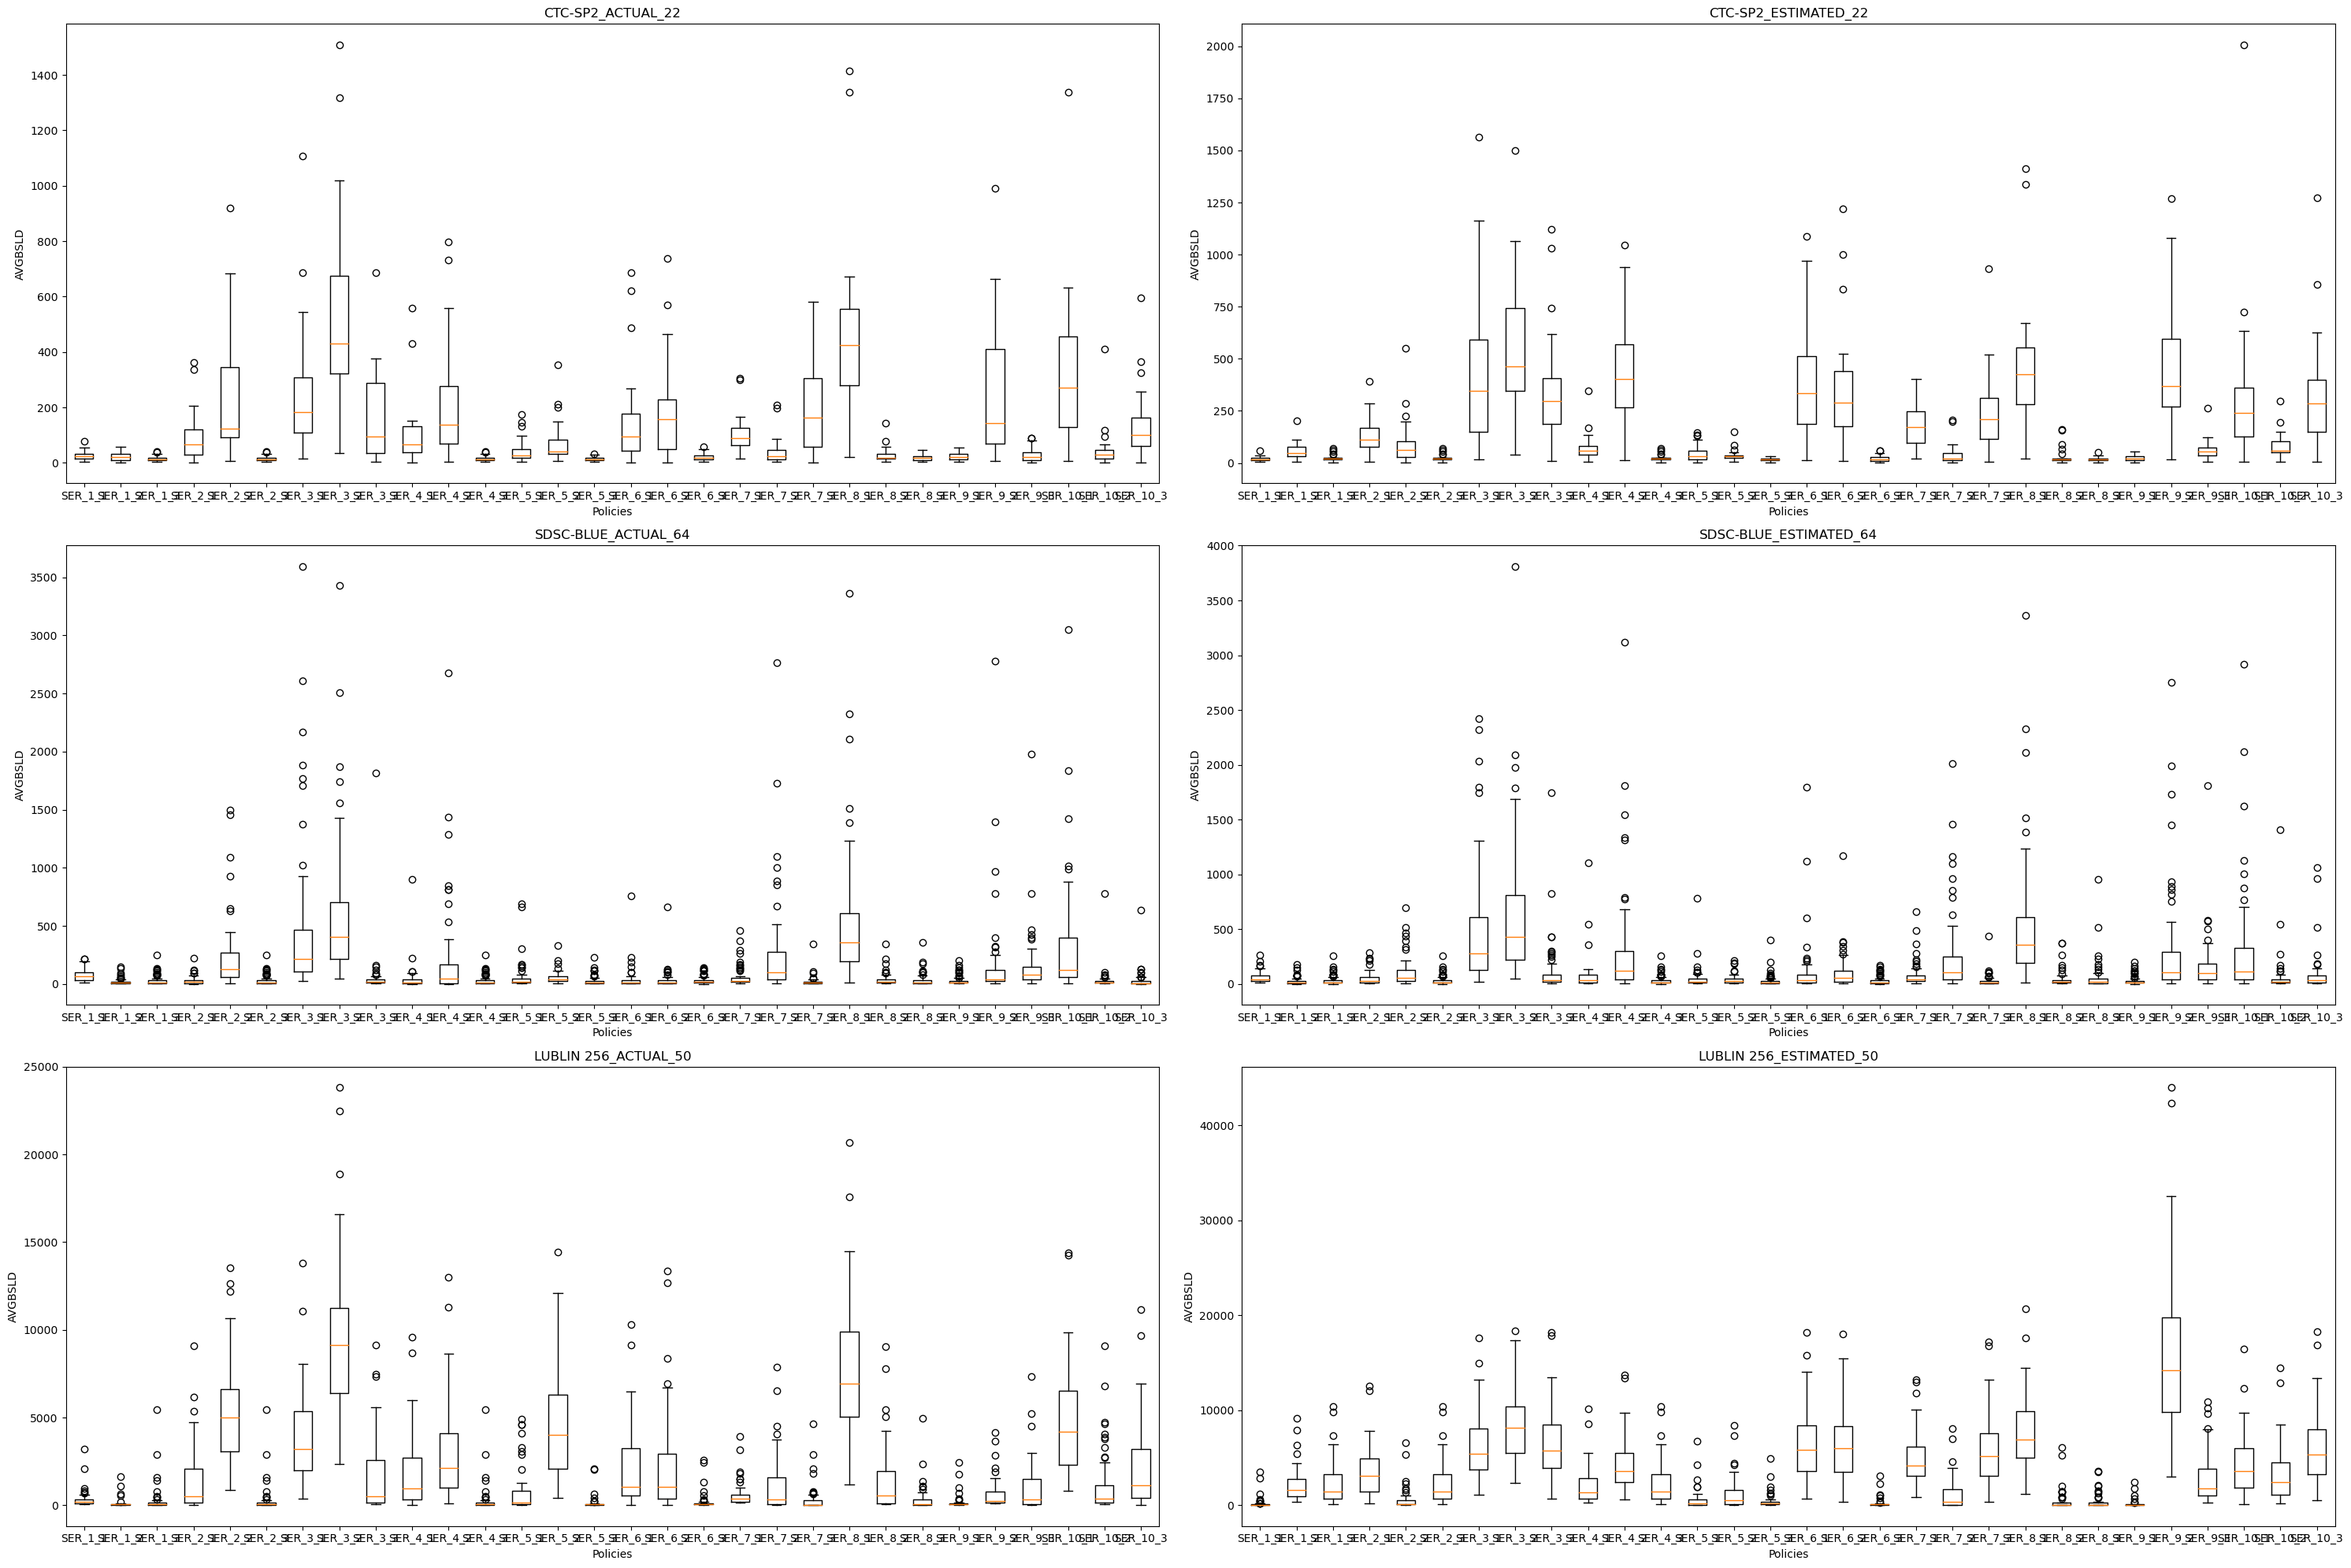

In [42]:
df=[]

# Lire le fichier CSV
df.append(pd.read_csv('CTC-SP2_ACTUAL_22_30.csv'))
df.append(pd.read_csv('CTC-SP2_ESTIMATED_22_30.csv'))
df.append(pd.read_csv('SDSC-BLUE_ACTUAL_64_30.csv'))
df.append(pd.read_csv('SDSC-BLUE_ESTIMATED_64_30.csv'))
df.append(pd.read_csv('LUBLIN 256_ACTUAL_50_30.csv'))
df.append(pd.read_csv('LUBLIN 256_ESTIMATED_50_30.csv'))
title= ['CTC-SP2_ACTUAL_22','CTC-SP2_ESTIMATED_22','SDSC-BLUE_ACTUAL_64','SDSC-BLUE_ESTIMATED_64','LUBLIN 256_ACTUAL_50','LUBLIN 256_ESTIMATED_50']
names=["SER_1_1","SER_1_2","SER_1_3",
         "SER_2_1","SER_2_2","SER_2_3",
         "SER_3_1","SER_3_2","SER_3_3",
         "SER_4_1","SER_4_2","SER_4_3",
         "SER_5_1","SER_5_2","SER_5_3",
         "SER_6_1","SER_6_2","SER_6_3",
         "SER_7_1","SER_7_2","SER_7_3",
         "SER_8_1","SER_8_2","SER_8_3",
         "SER_9_1","SER_9_2","SER_9_3",
         "SER_10_1","SER_10_2","SER_10_3"]
# Créer une figure avec des sous-graphiques (2 lignes, 3 colonnes)
print(len(names))
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(30, 20))
i=0
# Boucle sur chaque subplot
for ax in axes.flatten():
    ax.boxplot(df[i],labels=names)
    ax.set_title(title[i])
    ax.set_xlabel("Policies")
    ax.set_ylabel("AVGBSLD")
    i=i+1

# Ajuster les espaces entre les subplots
plt.tight_layout()

# Sauvegarder la figure dans les deux formats
#plt.savefig("../../images/Final_Tester_analysis_SER.pdf")
#plt.savefig("../../images/Final_Tester_analysis_SER.png")
# Afficher la figure
plt.show()

In [43]:
data = []
data2=[]
files = [
    'CTC-SP2_ACTUAL_22_30.csv',
    'CTC-SP2_ESTIMATED_22_30.csv',
    'SDSC-BLUE_ACTUAL_64_30.csv',
    'SDSC-BLUE_ESTIMATED_64_30.csv',
    'LUBLIN 256_ACTUAL_50_30.csv',
    'LUBLIN 256_ESTIMATED_50_30.csv'
]

for file in files:
    data.append(pd.read_csv(file).mean())
    data2.append(pd.read_csv(file))

concatenated_df = pd.concat(data2)

# Calculer la moyenne de chaque colonne
column_means = concatenated_df.mean()

# Afficher les moyennes
print(column_means)


SER_1_1      150.910976
SER_1_2      446.512847
SER_1_3      526.965793
SER_2_1      934.296270
SER_2_2     1190.285571
SER_2_3      526.965793
SER_3_1     2191.533502
SER_3_2     3660.277173
SER_3_3     1632.353521
SER_4_1      769.367045
SER_4_2     1525.473970
SER_4_3      526.965793
SER_5_1      299.680841
SER_5_2     1142.967936
SER_5_3      133.453425
SER_6_1     1705.915417
SER_6_2     1695.603977
SER_6_3      111.020040
SER_7_1     1073.313382
SER_7_2      572.695671
SER_7_3     1225.136452
SER_8_1     3150.080252
SER_8_2      391.366782
SER_8_3      172.269608
SER_9_1       92.051732
SER_9_2     3166.653109
SER_9_3      825.255875
SER_10_1    1887.726092
SER_10_2     905.714689
SER_10_3    1608.875335
dtype: float64


In [44]:
size=column_means.shape[0]
print(size)
best_25p=pd.Series(column_means.sort_values()).head(int(size/4))
print (best_25p)

30
SER_9_1     92.051732
SER_6_3    111.020040
SER_5_3    133.453425
SER_1_1    150.910976
SER_8_3    172.269608
SER_5_1    299.680841
SER_8_2    391.366782
dtype: float64


In [51]:
from mlxtend.frequent_patterns import apriori, association_rules 
from mlxtend.preprocessing import TransactionEncoder
table = [['sqrt(p)', 'sqrt(w)', 'w1', 'q2'],
         ['w2p', 'q2r', 'x2q', 'q2z'],
         ['p2w', 'q2z', 'z2r', 'z2w'],
         ['sqrt(p)', 'sqrt(w)', 'x2', 'z2q'],
         ['q1x', 'q2p', 'q2r', 'q2x'],
         ['sqrt(r)', 'sqrt(x)', 'x1w', 'r2z'],
         ['r1', 'p1q', 'r1w', 'w2z']]
occurrences = {}

for row in table:
    for element in row:
        if element in occurrences:
            occurrences[element] += 1
        else:
            occurrences[element] = 1

sorted_occurrences = sorted(occurrences.items(), key=lambda x: x[1], reverse=True)


for key, value in sorted_occurrences:
    print(f"{key}: {value}")
te = TransactionEncoder()
te_ary = te.fit(table).transform(table)
df = pd.DataFrame(te_ary, columns=te.columns_)
apriori(df, min_support=0.2, use_colnames=True)

sqrt(p): 2
sqrt(w): 2
q2r: 2
q2z: 2
w1: 1
q2: 1
w2p: 1
x2q: 1
p2w: 1
z2r: 1
z2w: 1
x2: 1
z2q: 1
q1x: 1
q2p: 1
q2x: 1
sqrt(r): 1
sqrt(x): 1
x1w: 1
r2z: 1
r1: 1
p1q: 1
r1w: 1
w2z: 1


,support,itemsets
0,0.285714,(q2r)
1,0.285714,(q2z)
2,0.285714,(sqrt(p))
3,0.285714,(sqrt(w))
4,0.285714,"(sqrt(p), sqrt(w))"


In [46]:
coefs =[
    ['sqrt(p)',0.0020893531222993867],
    ['sqrt(w)' ,0.07854194372065733 ],
    ['w1' , -0.006625939479394783],
    ['q2' ,7.181069207574641e-06],
    ['w2p' , 3.41494388205929e-11],
    ['q2r' , 8.434546202908153e-11],
    ['x2q' , 6.040092802430363e-12],
    ['q2z' , 1.4144753269951026e-10],
    ['p2w' , 1.805372969333537e-12],
    ['q2z' ,  2.9490703931687534e-10],
    ['z2r' , -4.365767460977399e-18],
    ['z2w' , -2.5147778909892017e-14],
    ['sqrt(p)' ,0.002478460646831668],
    ['sqrt(w)' , 0.010018675927509917],
    ['x2' , 3.447719368227475e-10],
    ['z2q' , 3.284764912103381e-14],
    ['q1x' , 4.334514355690063e-07 ],
    ['q2p' , 3.7048896336515095e-10],
    ['q2r' , 4.46724004801406e-11],
    ['q2x' , -1.4982237360932398e-09],
    ['sqrt(r)' , 0.0008984146948593166],
    ['sqrt(x)' , 0.0007019600797486547],
    ['x1w' , -1.49150173486992e-08],
    ['r2z' , -1.9201495800678795e-17],
    ['r1' , 9.988922034894187e-07],
    ['p1q' , 1.405507611818642e-07 ],
    ['r1w' , 1.3285438413486813e-08],
    ['w2z' , -2.3030892439833102e-10]


]
res =[]
for key, _ in sorted_occurrences:
    sum=0
    cpt=0
    for i in range (0,len(coefs)):
        if key == coefs[i][0]:
            sum += coefs[i][1]
            cpt+=1
    res.append([key, sum/cpt])

result=pd.DataFrame(res)
print (result)


          0             1
0   sqrt(p)  2.283907e-03
1   sqrt(w)  4.428031e-02
2       q2r  6.450893e-11
3       q2z  2.181773e-10
4        w1 -6.625939e-03
5        q2  7.181069e-06
6       w2p  3.414944e-11
7       x2q  6.040093e-12
8       p2w  1.805373e-12
9       z2r -4.365767e-18
10      z2w -2.514778e-14
11       x2  3.447719e-10
12      z2q  3.284765e-14
13      q1x  4.334514e-07
14      q2p  3.704890e-10
15      q2x -1.498224e-09
16  sqrt(r)  8.984147e-04
17  sqrt(x)  7.019601e-04
18      x1w -1.491502e-08
19      r2z -1.920150e-17
20       r1  9.988922e-07
21      p1q  1.405508e-07
22      r1w  1.328544e-08
23      w2z -2.303089e-10


In [47]:
data = []
data2=[]
files = [
    'CTC-SP2_ACTUAL_22_38.csv',
    'CTC-SP2_ESTIMATED_22_38.csv',
    'SDSC-BLUE_ACTUAL_64_38.csv',
    'SDSC-BLUE_ESTIMATED_64_38.csv',
    'LUBLIN 256_ACTUAL_50_38.csv',
    'LUBLIN 256_ESTIMATED_50_38.csv'
]

for file in files:
    data.append(pd.read_csv(file).mean())
    data2.append(pd.read_csv(file))

concatenated_df = pd.concat(data2)

# Calculer la moyenne de chaque colonne
column_means = concatenated_df.mean()

# Afficher les moyennes
print(column_means)


LIN          1164.351312
S3_V1_D3     1786.410008
S3_V1_D4     1581.504837
S3_V2_D1      257.833541
S3_V2_D2      582.963584
S3_V2_D3     1572.145913
S3_V2_D4     1120.586443
S3_V3_D1     1392.031589
S3_V3_D2      774.513606
S3_V3_D3      164.048508
S3_V3_D4     1797.404274
S3_V4_D1     1307.979757
S3_V4_D2     2852.011342
S3_V4_D3      512.305078
S3_V4_D4     2227.419954
S3_V5_D1     1941.282925
S3_V5_D2     2114.092431
S3_V5_D3     2135.773532
S3_V5_D4     2167.203087
S3_V6_D1      834.701119
S3_V6_D2     1235.758851
S3_V6_D3     1594.092510
S3_V7_D1      907.833805
S3_V7_D2      744.552530
S3_V7_D3     1217.308421
S3_V7_D4     3850.630728
S3_V8_D1     3423.936180
S3_V8_D2      772.708120
S3_V8_D3     2016.322381
S3_V8_D4     1615.862137
S3_V9_D1     3383.367434
S3_V9_D2     1266.398382
S3_V9_D3      333.022067
S3_V9_D4     1081.861667
S3_V10_D1    4468.807476
S3_V10_D2     551.544911
S3_V10_D3     667.106018
S3_V10_D4     542.374548
dtype: float64


In [48]:
size=column_means.shape[0]
print(size)
best_25p=pd.Series(column_means.sort_values()).head(int(size/4))
print (best_25p)

38
S3_V3_D3     164.048508
S3_V2_D1     257.833541
S3_V9_D3     333.022067
S3_V4_D3     512.305078
S3_V10_D4    542.374548
S3_V10_D2    551.544911
S3_V2_D2     582.963584
S3_V10_D3    667.106018
S3_V7_D2     744.552530
dtype: float64


In [50]:
table =[['r2q', 'q3p', 'q3r'],
        ['sqrt(p)', 'pq', 'qr'],
        ['pq', 'q2p', 'q3r'],
        ['q4', 'r2q', 'q3r'],
        ['q2r', 'p3q', 'p4q'],
        ['q', 'pq', 'p2q'],
        ['q', 'r2q', 'q3p'],
        ['qr', 'p3q', 'p4q'],
        ['q3', 'pq', 'p2q']]
occurrences = {}

for row in table:
    for element in row:
        if element in occurrences:
            occurrences[element] += 1
        else:
            occurrences[element] = 1

sorted_occurrences = sorted(occurrences.items(), key=lambda x: x[1], reverse=True)


for key, value in sorted_occurrences:
    print(f"{key}: {value}")
te = TransactionEncoder()
te_ary = te.fit(table).transform(table)
df = pd.DataFrame(te_ary, columns=te.columns_)
apriori(df, min_support=0.2, use_colnames=True)

pq: 4
r2q: 3
q3r: 3
q3p: 2
qr: 2
p3q: 2
p4q: 2
q: 2
p2q: 2
sqrt(p): 1
q2p: 1
q4: 1
q2r: 1
q3: 1


,support,itemsets
0,0.222222,(p2q)
1,0.222222,(p3q)
2,0.222222,(p4q)
3,0.444444,(pq)
4,0.222222,(q)
5,0.222222,(q3p)
6,0.333333,(q3r)
7,0.222222,(qr)
8,0.333333,(r2q)
9,0.222222,"(pq, p2q)"


In [16]:
coefs =[
    ['r2q' , 1.1726854852214275e-14],
    ['q3p' , 1.6365657596188036e-12],
    ['q3r' , 1.0180533491581238e-13],
    ['sqrt(p)' , 0.0019034277136650403],
    ['pq' , 5.036764993849649e-08],
    ['qr' , 1.4389000094027098e-08],
    ['pq' , 3.0913486207411006e-07],
    ['q2p' , -9.078380766095692e-10,],
    ['q3r' , 1.6863871429480466e-13],
    ['q4' , 1.286884983493206e-10],
    ['r2q' ,3.753711116544905e-14,],
    ['q3r' , -1.0766761444726744e-13],
    ['q2r' , 1.0680016893577203e-10 ],
    ['p3q' , 5.738952452786748e-17,],
    ['p4q' ,-4.081894643335698e-22],
    ['q' , 0.0009082622971005504],
    ['pq' ,1.3343674709693634e-07],
    ['p2q',-1.5233168781154007e-12],
    ['q' , 0.002456762589956544 ],
    ['r2q', 6.9539446090029795e-15,],
    ['q3p' , -3.0982717193553553e-13],
    ['qr', 2.9231327962780473e-08],
    ['p3q' , 5.361623143491753e-17],
    ['p4q' , -3.810956866227172e-22],
    ['q3' , -1.0317089888020298e-08],
    ['pq' , 2.4376534328704947e-07],
    ['p2q' , -3.0417566149953275e-12]
]
res =[]
for key, _ in sorted_occurrences:
    sum=0
    cpt=0
    for i in range (0,len(coefs)):
        if key == coefs[i][0]:
            sum += coefs[i][1]
            cpt+=1
    res.append([key, sum/cpt])

result=pd.DataFrame(res)
print (result)


          0             1
0        pq  1.841762e-07
1       r2q  1.873930e-14
2       q3r  5.425881e-14
3       q3p  6.633693e-13
4        qr  2.181016e-08
5       p3q  5.550288e-17
6       p4q -3.946426e-22
7         q  1.682512e-03
8       p2q -2.282537e-12
9   sqrt(p)  1.903428e-03
10      q2p -9.078381e-10
11       q4  1.286885e-10
12      q2r  1.068002e-10
13       q3 -1.031709e-08


In [9]:
print(data)

[LIN          140.383254
S3_V1_D3     203.161256
S3_V1_D4     222.973505
S3_V2_D1      19.227647
S3_V2_D2      48.166170
S3_V2_D3      42.834932
S3_V2_D4      85.433515
S3_V3_D1     104.321543
S3_V3_D2      50.376682
S3_V3_D3      20.238758
S3_V3_D4     265.022215
S3_V4_D1      87.876406
S3_V4_D2     341.722175
S3_V4_D3      59.316003
S3_V4_D4     222.038866
S3_V5_D1     228.458310
S3_V5_D2     316.679231
S3_V5_D3     330.340192
S3_V5_D4     333.471647
S3_V6_D1      23.590393
S3_V6_D2      72.018190
S3_V6_D3     157.350924
S3_V7_D1     125.782869
S3_V7_D2      23.622245
S3_V7_D3      88.007723
S3_V7_D4     617.087971
S3_V8_D1     502.567039
S3_V8_D2     100.232614
S3_V8_D3     248.560864
S3_V8_D4      35.763844
S3_V9_D1     507.743015
S3_V9_D2     115.929842
S3_V9_D3       7.092092
S3_V9_D4      84.033059
S3_V10_D1    843.337458
S3_V10_D2      7.209920
S3_V10_D3     24.644018
S3_V10_D4     14.344988
dtype: float64, LIN          189.193358
S3_V1_D3     196.635861
S3_V1_D4     301.439461

    vif  deg       MSE
0     1    1  0.216691
1     1    3  0.240473
2     1    4  0.244200
3     2    1  0.216900
4     2    2  0.232142
5     2    3  0.243208
6     2    4  0.249975
7     3    1  0.228000
8     3    2  0.240976
9     3    3  0.242833
10    3    4  0.237769
11    4    1  0.238525
12    4    2  0.238055
13    4    3  0.241292
14    4    4  0.248847
15    5    1  0.231197
16    5    2  0.247784
17    5    3  0.248867
18    5    4  0.248857
19    6    1  0.227482
20    6    2  0.242067
21    6    3  0.240805
22    7    1  0.217726
23    7    2  0.232035
24    7    3  0.238520
25    7    4  0.245384
26    8    1  0.217849
27    8    2  0.242137
28    8    3  0.244138
29    8    4  0.248804
30    9    1  0.223613
31    9    2  0.228928
32    9    3  0.230567
33    9    4  0.248789
34   10    1  0.210780
35   10    2  0.231650
36   10    3  0.242435
37   10    4  0.245010


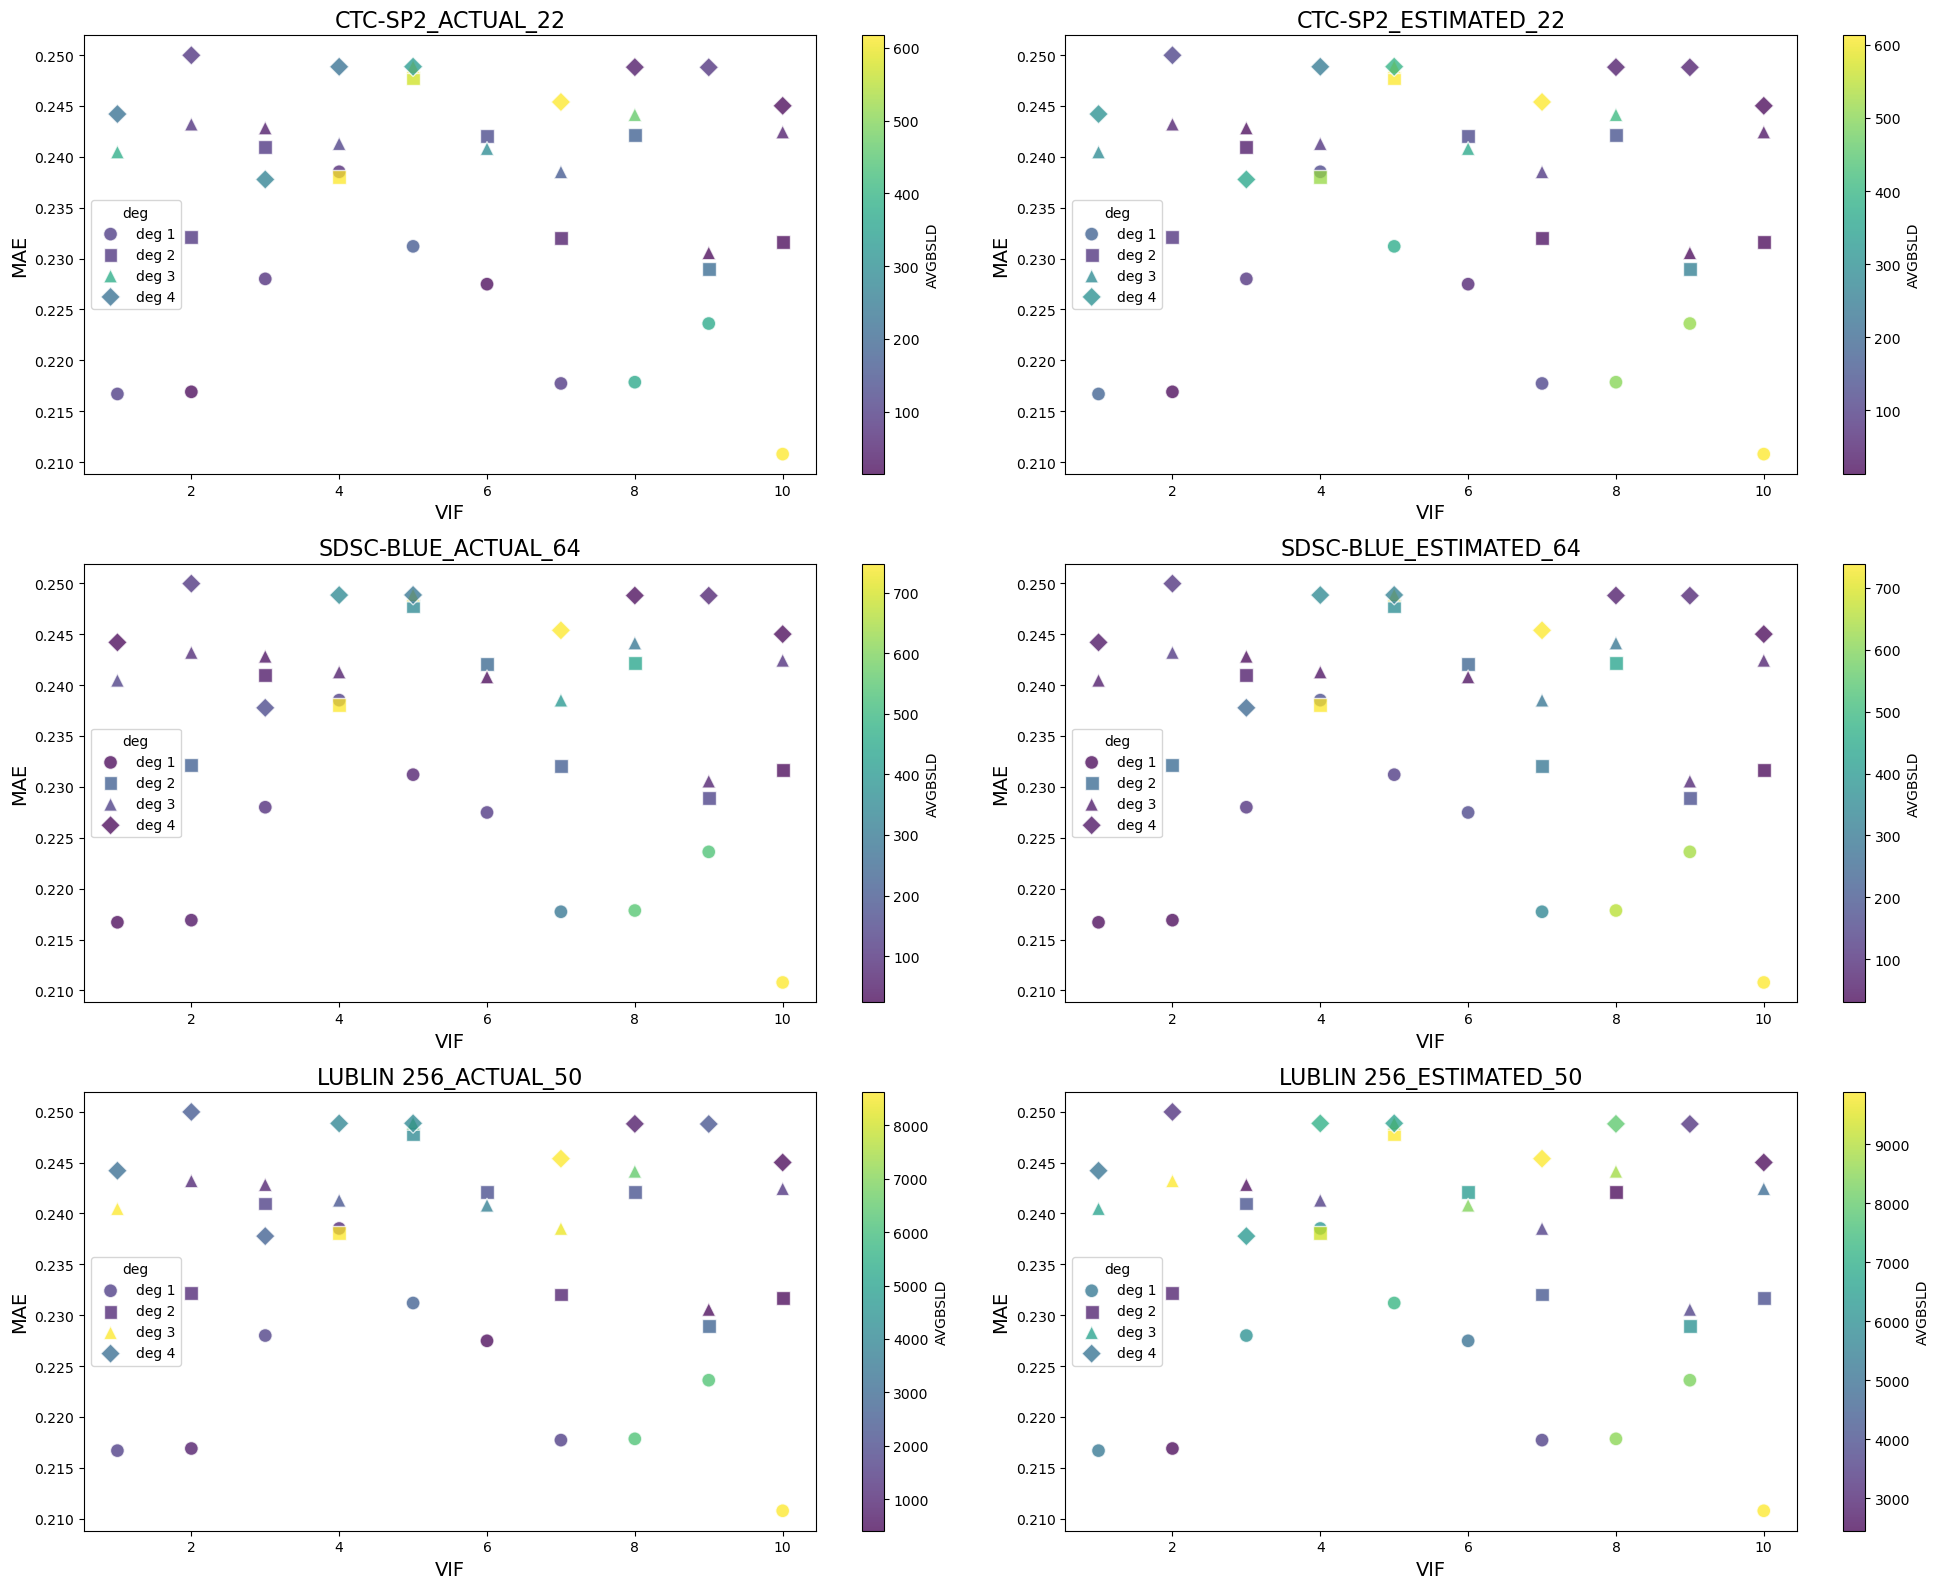

In [10]:
df = pd.read_csv("../regressor/3D_MSE.csv")
print (df)
# Créer le graphique
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(20, 16))
title= ['CTC-SP2_ACTUAL_22','CTC-SP2_ESTIMATED_22','SDSC-BLUE_ACTUAL_64','SDSC-BLUE_ESTIMATED_64','LUBLIN 256_ACTUAL_50','LUBLIN 256_ESTIMATED_50']
# Créer une palette de couleurs pour les différentes valeurs de deg
shapes = {1: 'o', 2: 's', 3: '^', 4: 'D'}
i=0
for _, ax in enumerate(axes.flatten()):
    df['colors']=data[i].values
    for shape in shapes:
        subset = df[df['deg'] == shape]
        sc = ax.scatter(subset['vif'], subset['MSE'], s=100, c=subset['colors'], cmap='viridis', marker=shapes[shape], label=f'deg {shape}', edgecolors='w', alpha=0.75)
    
    # Ajouter une barre de couleur
    cbar = plt.colorbar(sc, ax=ax)
    cbar.set_label('AVGBSLD')
    
    # Ajouter des labels et un titre
    ax.set_xlabel('VIF', fontsize=14)
    ax.set_ylabel('MAE', fontsize=14)
    ax.set_title(title[i], fontsize=16)
    
    # Ajouter une légende pour les formes
    handles, labels = ax.get_legend_handles_labels()
    ax.legend(handles, labels, title='deg')
    i+=1

# Ajuster la mise en page
plt.tight_layout()

# Enregistrer le graphique
plt.savefig("../../images/4D_MSE.png")
plt.savefig("../../images/4D_MSE.pdf")

# Afficher le graphique
plt.show()

In [11]:
print(data)

[LIN          140.383254
S3_V1_D3     203.161256
S3_V1_D4     222.973505
S3_V2_D1      19.227647
S3_V2_D2      48.166170
S3_V2_D3      42.834932
S3_V2_D4      85.433515
S3_V3_D1     104.321543
S3_V3_D2      50.376682
S3_V3_D3      20.238758
S3_V3_D4     265.022215
S3_V4_D1      87.876406
S3_V4_D2     341.722175
S3_V4_D3      59.316003
S3_V4_D4     222.038866
S3_V5_D1     228.458310
S3_V5_D2     316.679231
S3_V5_D3     330.340192
S3_V5_D4     333.471647
S3_V6_D1      23.590393
S3_V6_D2      72.018190
S3_V6_D3     157.350924
S3_V7_D1     125.782869
S3_V7_D2      23.622245
S3_V7_D3      88.007723
S3_V7_D4     617.087971
S3_V8_D1     502.567039
S3_V8_D2     100.232614
S3_V8_D3     248.560864
S3_V8_D4      35.763844
S3_V9_D1     507.743015
S3_V9_D2     115.929842
S3_V9_D3       7.092092
S3_V9_D4      84.033059
S3_V10_D1    843.337458
S3_V10_D2      7.209920
S3_V10_D3     24.644018
S3_V10_D4     14.344988
dtype: float64, LIN          189.193358
S3_V1_D3     196.635861
S3_V1_D4     301.439461

In [12]:
data = []
files = [
    'CTC-SP2_ACTUAL_22_8.csv',
    'CTC-SP2_ESTIMATED_22_8.csv',
    'SDSC-BLUE_ACTUAL_64_8.csv',
    'SDSC-BLUE_ESTIMATED_64_8.csv',
    'LUBLIN 256_ACTUAL_50_8.csv',
    'LUBLIN 256_ESTIMATED_50_8.csv'
]

for file in files:
    data.append(pd.read_csv(file))

# Concaténer les DataFrames
concatenated_df = pd.concat(data)

# Calculer la moyenne de chaque colonne
column_means = concatenated_df.mean()

# Afficher les moyennes
print(column_means)

LIN          1164.351312
S3_V2_D1      257.833541
S3_V10_D4     542.374548
S4_V7_D1      411.896122
S4_V9_D2      920.520924
S4_V9_D4      362.901237
SAF           223.991682
F2            165.814373
dtype: float64


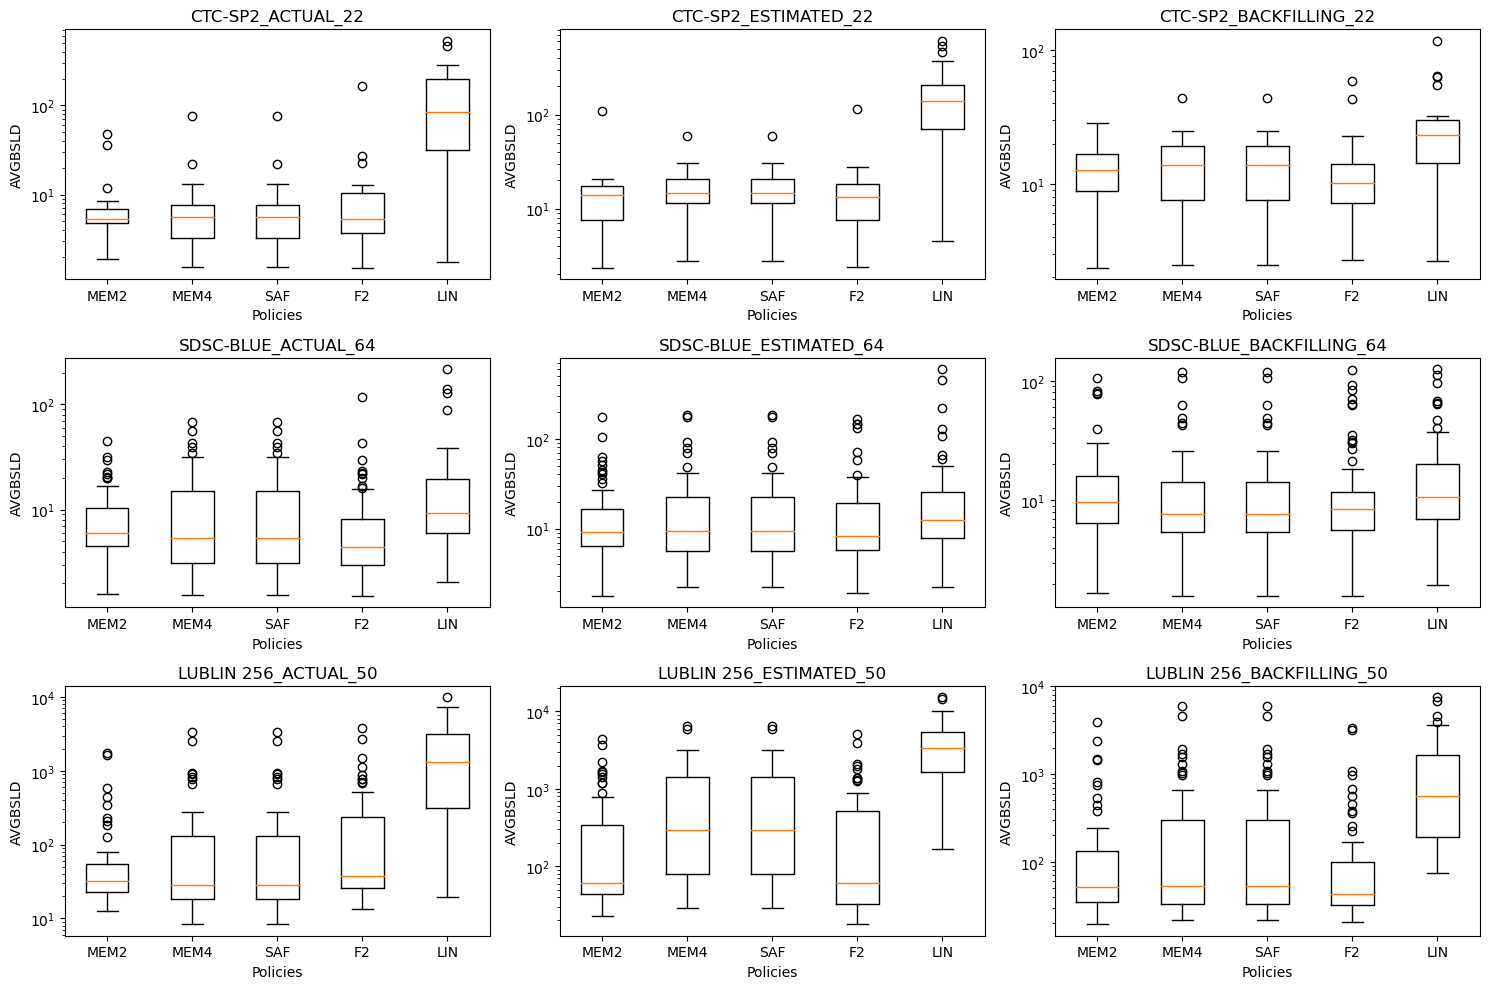

In [13]:
df=[]

# Lire le fichier CSV
df.append(pd.read_csv('CTC-SP2_ACTUAL_22_5.csv'))
df.append(pd.read_csv('CTC-SP2_ESTIMATED_22_5.csv'))
df.append(pd.read_csv('CTC-SP2_BACKFILLING_22_5.csv'))
df.append(pd.read_csv('SDSC-BLUE_ACTUAL_64_5.csv'))
df.append(pd.read_csv('SDSC-BLUE_ESTIMATED_64_5.csv'))
df.append(pd.read_csv('SDSC-BLUE_BACKFILLING_64_5.csv'))
df.append(pd.read_csv('LUBLIN 256_ACTUAL_50_5.csv'))
df.append(pd.read_csv('LUBLIN 256_ESTIMATED_50_5.csv'))
df.append(pd.read_csv('LUBLIN 256_BACKFILLING_50_5.csv'))
title= ['CTC-SP2_ACTUAL_22','CTC-SP2_ESTIMATED_22','CTC-SP2_BACKFILLING_22','SDSC-BLUE_ACTUAL_64','SDSC-BLUE_ESTIMATED_64','SDSC-BLUE_BACKFILLING_64','LUBLIN 256_ACTUAL_50','LUBLIN 256_ESTIMATED_50','LUBLIN 256_BACKFILLING_50']
names=["MEM2","MEM4","SAF","F2","LIN"]
# Créer une figure avec des sous-graphiques (2 lignes, 3 colonnes)
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(15, 10))
i=0
# Boucle sur chaque subplot
for ax in axes.flatten():
    ax.boxplot(df[i],labels=names)
    ax.set_title(title[i])
    ax.set_yscale("log")
    ax.set_xlabel("Policies")
    ax.set_ylabel("AVGBSLD")
    i=i+1

# Ajuster les espaces entre les subplots
plt.tight_layout()

# Sauvegarder la figure dans les deux formats
#plt.savefig("../../images/MEM2_VS_MEM4+Back.pdf")
#plt.savefig("../../images/MEM2_VS_MEM4+Back.png")
# Afficher la figure
plt.show()

In [14]:
data = []
files = [
    'CTC-SP2_ACTUAL_22_5.csv',
    'CTC-SP2_ESTIMATED_22_5.csv',
    'CTC-SP2_BACKFILLING_22_5.csv',
    'SDSC-BLUE_ACTUAL_64_5.csv',
    'SDSC-BLUE_ESTIMATED_64_5.csv',
    'SDSC-BLUE_BACKFILLING_64_5.csv',
    'LUBLIN 256_ACTUAL_50_5.csv',
    'LUBLIN 256_ESTIMATED_50_5.csv',
    'LUBLIN 256_BACKFILLING_50_5.csv'
]

for file in files:
    data.append(pd.read_csv(file))

# Concaténer les DataFrames
concatenated_df = pd.concat(data)

# Calculer la moyenne de chaque colonne
column_means = concatenated_df.mean()

# Afficher les moyennes
print(column_means)

MEM2    121.377152
MEM4    211.353406
SAF     211.353406
F2      146.366282
LIN     941.844154
dtype: float64


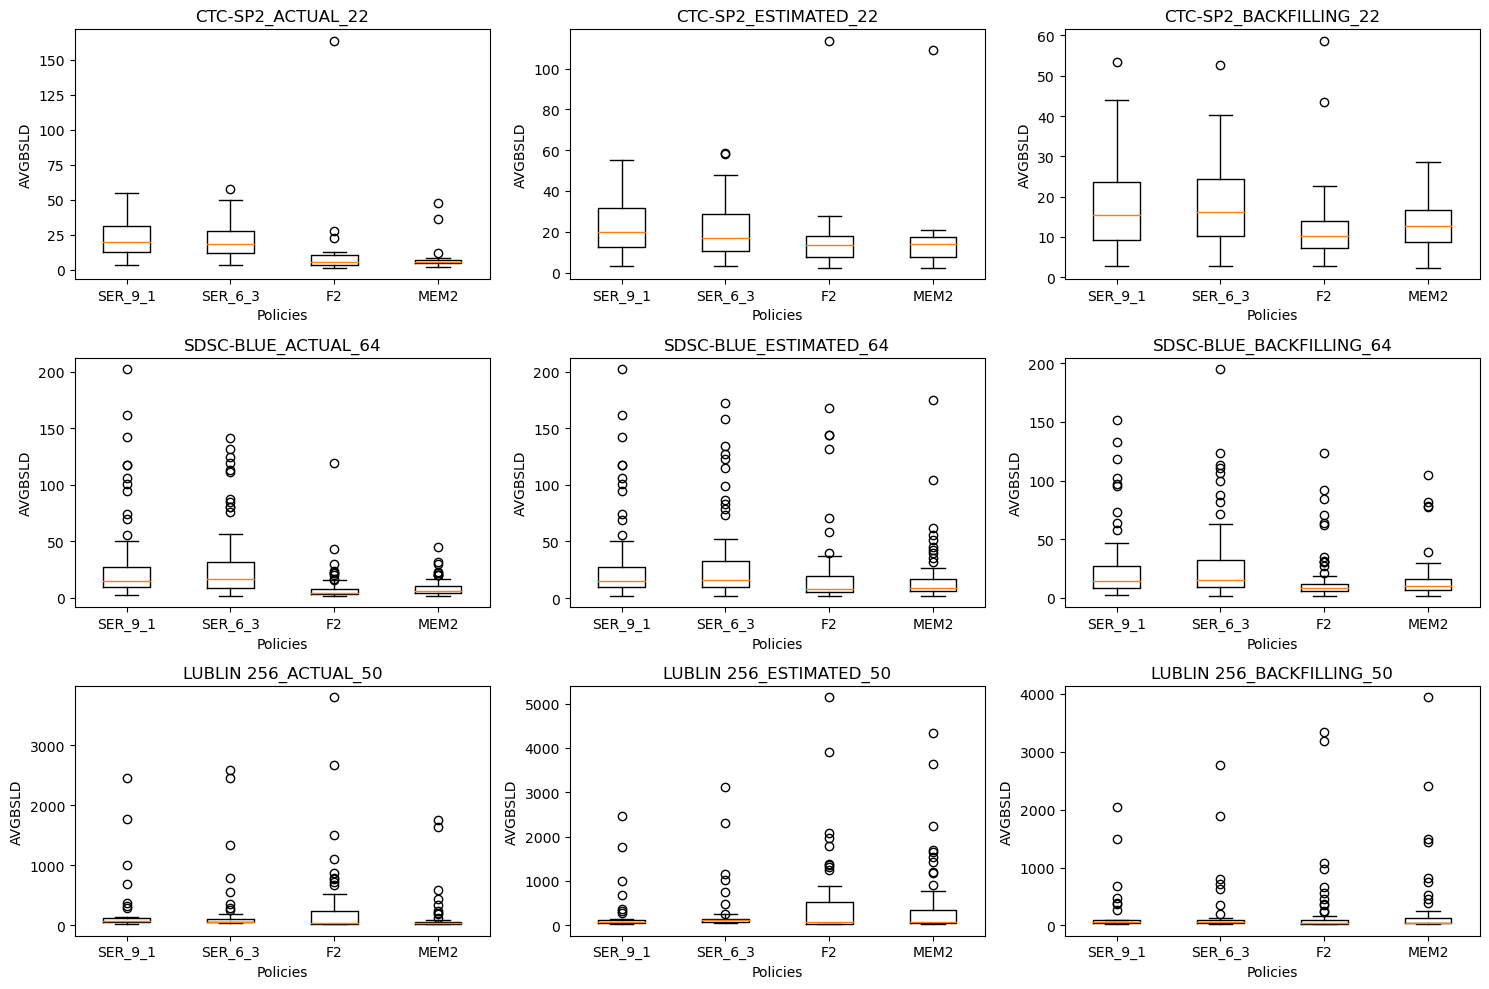

In [30]:
df=[]

# Lire le fichier CSV
df.append(pd.read_csv('CTC-SP2_ACTUAL_22_4.csv'))
df.append(pd.read_csv('CTC-SP2_ESTIMATED_22_4.csv'))
df.append(pd.read_csv('CTC-SP2_BACKFILLING_22_4.csv'))
df.append(pd.read_csv('SDSC-BLUE_ACTUAL_64_4.csv'))
df.append(pd.read_csv('SDSC-BLUE_ESTIMATED_64_4.csv'))
df.append(pd.read_csv('SDSC-BLUE_BACKFILLING_64_4.csv'))
df.append(pd.read_csv('LUBLIN 256_ACTUAL_50_4.csv'))
df.append(pd.read_csv('LUBLIN 256_ESTIMATED_50_4.csv'))
df.append(pd.read_csv('LUBLIN 256_BACKFILLING_50_4.csv'))
title= ['CTC-SP2_ACTUAL_22','CTC-SP2_ESTIMATED_22','CTC-SP2_BACKFILLING_22','SDSC-BLUE_ACTUAL_64','SDSC-BLUE_ESTIMATED_64','SDSC-BLUE_BACKFILLING_64','LUBLIN 256_ACTUAL_50','LUBLIN 256_ESTIMATED_50','LUBLIN 256_BACKFILLING_50']
names=["SER_9_1","SER_6_3","F2","MEM2"]
# Créer une figure avec des sous-graphiques (2 lignes, 3 colonnes)
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(15, 10))
i=0
# Boucle sur chaque subplot
for ax in axes.flatten():
    ax.boxplot(df[i],labels=names)
    ax.set_title(title[i])
    ax.set_xlabel("Policies")
    ax.set_ylabel("AVGBSLD")
    i=i+1

# Ajuster les espaces entre les subplots
plt.tight_layout()

# Sauvegarder la figure dans les deux formats
plt.savefig("../../images/Serial+Back.pdf")
plt.savefig("../../images/Serial+Back.png")
# Afficher la figure
plt.show()

In [17]:
data = []
files = [
    'CTC-SP2_ACTUAL_22_4.csv',
    'CTC-SP2_ESTIMATED_22_4.csv',
    'CTC-SP2_BACKFILLING_22_4.csv',
    'SDSC-BLUE_ACTUAL_64_4.csv',
    'SDSC-BLUE_ESTIMATED_64_4.csv',
    'SDSC-BLUE_BACKFILLING_64_4.csv',
    'LUBLIN 256_ACTUAL_50_4.csv',
    'LUBLIN 256_ESTIMATED_50_4.csv',
    'LUBLIN 256_BACKFILLING_50_4.csv'
]

for file in files:
    data.append(pd.read_csv(file))

# Concaténer les DataFrames
concatenated_df = pd.concat(data)

# Calculer la moyenne de chaque colonne
column_means = concatenated_df.mean()

# Afficher les moyennes
print(column_means)

SER_9_1     86.464170
SER_6_3    104.687567
F2         146.366282
MEM2       121.377152
dtype: float64


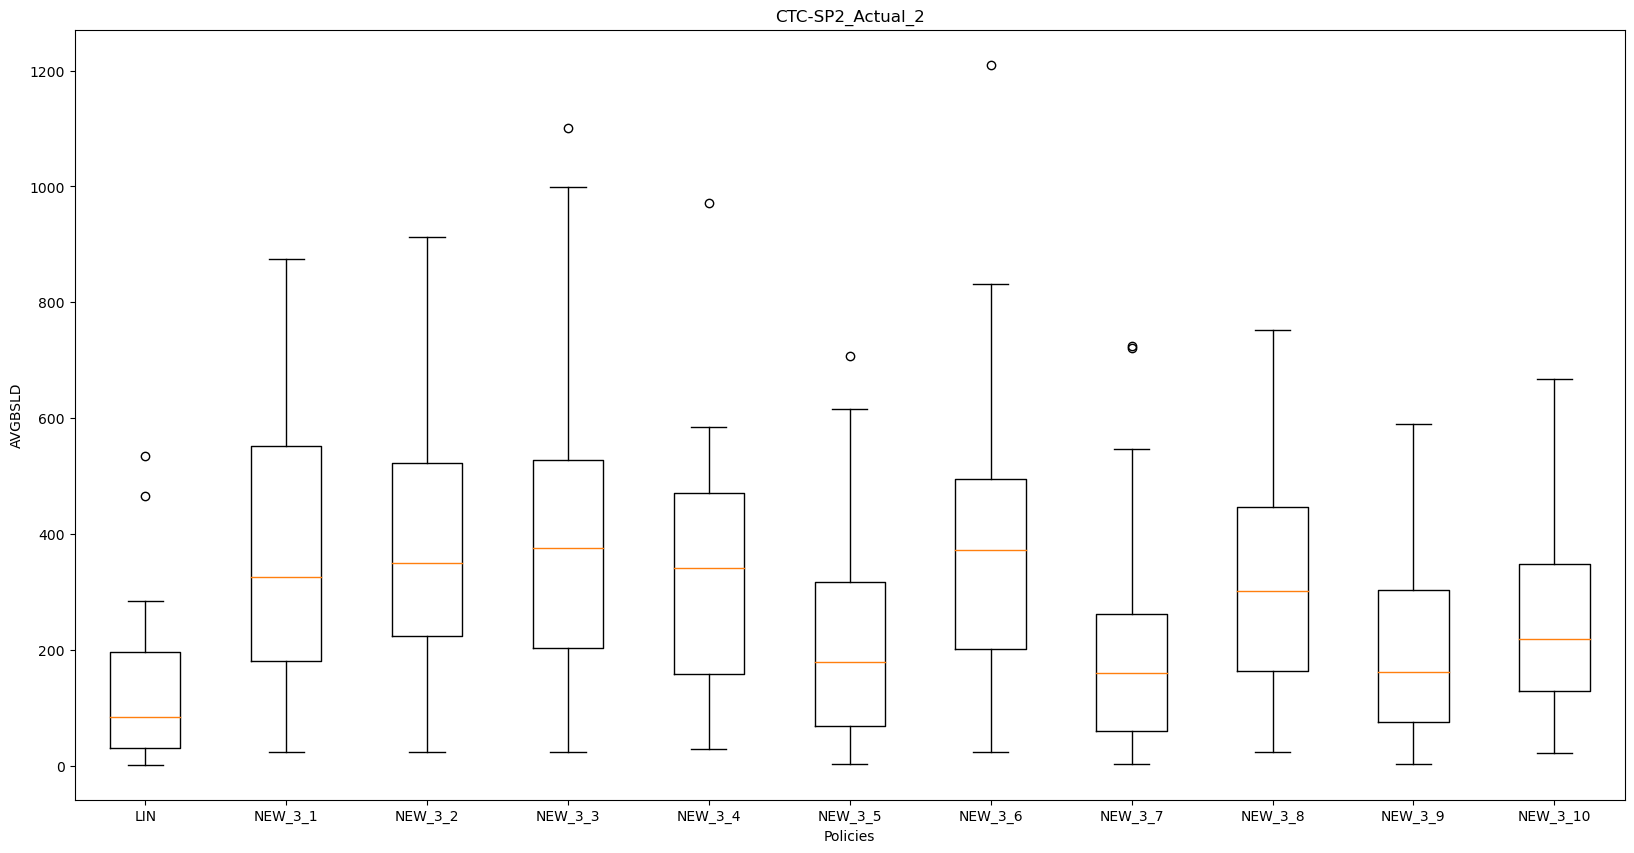

In [3]:
df = pd.read_csv('CTC-SP2_ACTUAL_22_11.csv')
plt.figure(figsize = (20, 10))
plt.boxplot(df,labels=["LIN","NEW_3_1","NEW_3_2","NEW_3_3","NEW_3_4","NEW_3_5","NEW_3_6","NEW_3_7","NEW_3_8","NEW_3_9","NEW_3_10"])



plt.title("CTC-SP2_Actual_2")
plt.xlabel("Policies")
plt.ylabel("AVGBSLD")

plt.savefig("../../images/10_models_analysis.pdf")
plt.savefig("../../images/10_models_analysis.png")